                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
###                 Отчет по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"

                                              
                                                 Вариант 10
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                      Выполнил: Михейцев Никита, 430 гр.
                                                      Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.
                                    

####  Содержание
1. Задания
2. Цель работы
3. Вычисление интеграла
4. Решение системы
5. Вывод 


####   1. Задания
1.  Вычислить определенный интеграл заданным методом и с помощью функции numpy.trapz.

2. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

3. Решить систему заданным методом для 1000 уравнений (для 10000 уравнений).

4. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

5. Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 4. Разницу объяснить.

####   2. Цель работы
Освоить методы численного интегрирования. Вычислить определенный интеграл с использованием рекуррентной формулы трапеции с относительной точностью **0,01**
Научиться численно решать системы линейных уравнений. Решение систему из 1000 и 10000 уравнений методом простой итерации с относительной точностью **0,001**.

####   3. Вычисление интеграла
##### Рекуррентная квадратурная формула трапеций.

Определим $$ T(0) = h/2(f(a)+f(b))$$
Затем для каждого N > 0 определим T(N) = T(f,h), где T(f,h) - Формула трапеции с шагом $$h= (b-a)/2^N$$
Тогда $$T(N) =\frac{T(N-1)}{2}+h\sum^M_{k=1}f(x_{2k-1},\quad N=1,2,...,$$
где точки $$x_k = a + k*h$$делят интервал [a,b] на $$ 2^N=2M$$точек.

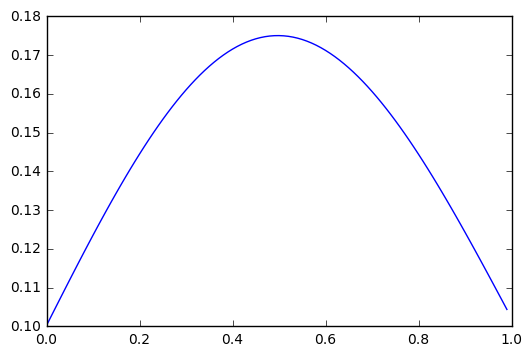

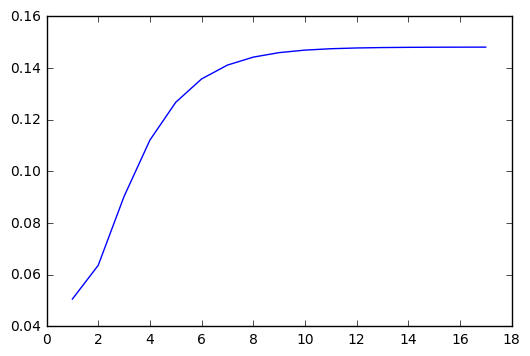

0.146638214317  =\= 0.148040311653


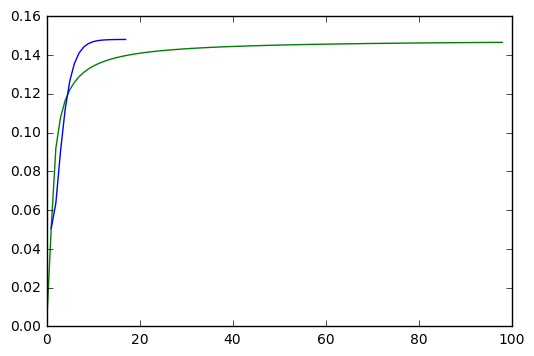

In [1]:
import numpy as np
import matplotlib.pyplot as plt
a=0 
b=1 
i = 2
e = 0.001
def f(t): 

    return np.sin(t+1)**4 / (1+ i*i + t*t + np.log(1+t) )
    #return np.sin(t)**2*np.e**(-i**3*t**2)/(1 + np.log((t+4)*(1+t)) + i*i*t*t*np.cos(t)**2)

def T(N): 
    h=b-a; 
    T0 = h/2*(f(a)+f(b)) 
    #print(T0) 
    if(N==1): 
        F=0 
        for k in range(1,2**(N-1)):
            h = (b-a)/(2**N)
            F+=f(a+(2*k-1)*h) 
            #h = (b-a)/(2**N) 
        return T0/2 + h*F
    elif (N == 0):
        return T0
    else: 
        F=0 
        for k in range(1,2**(N-1)): 
            h = (b-a)/(2**N)
            F+=f(a+(2*k-1)*h) 
            #h =  (b-a)/(2**N) 
    return T(N-1)/2 + h*F 
an = T(0)
bn = T(1)
nn = 1
while np.fabs(bn-an)/bn > e:
    nn += 1
    an = bn
    bn = T(nn)

x = np.arange(a,b,0.01)
y = [f(i) for i in x]
plt.plot (x,y)  #график подынтегральной функции
plt.show()

x1 = range(1,18)
y1 = [T(i) for i in x1]
plt.plot(x1,y1) # значение интеграла от номера итерации
plt.show()

nnn = 100
y2 =[]
for j in range (1,nnn):
    x2 = np.linspace(a,b,j)
    y3 = [f(i) for i in x2]
    y2.append(np.trapz(y3, dx = (b-a)/j))
plt.plot(range(0,nnn-1),y2,c = 'g')
plt.plot(x1,y1, c = 'b')
print (y2[-1],' =\=' ,T(nn))
plt.show()

####   4. Решение системы
Требуется решить систему вида:
$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 +...+ a_{1n}x_n & = & b_1  \\
a_{21}x_1 + a_{22}x_2 +...+ a_{2n}x_n & = & b_2\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1}x_1 + a_{n2}x_2 +...+ a_{nn}x_n & = & b_n\\
\end{cases}
$$
##### Метод решения:
Решив 1-ое уравнение системы относительно x1 получим:$$x_1 = \frac{b_1-(a_{11}x_1 + a_{12}x_2 +...+ a_{1n}x_n)}{a_{11}}$$
2-ое - относительно x2 , n-ое - относительно xn. 
В итоге эквивалентная система, в которой диагональные элементы строки выражены через оставщиеся:
$$ x = \alpha x+\beta$$
$$\alpha = \begin{pmatrix}
0 & -\frac{a_{12}}{a_{11}} & \cdots & -\frac{a_{1n}}{a_{11}} \\
-\frac{a_{21}}{a_{22}} & 0 & \cdots & -\frac{a_{2n}}{a_{22}} \\         
\vdots & \vdots & \ddots & \vdots \\
-\frac{a_{1n}}{a_{nn}} & -\frac{a_{2n}}{a_{nn}} & \cdots & 0
\end{pmatrix}
$$
$$
\beta = \begin{pmatrix}
b_{1}  \\
b_{2}  \\         
.  \\
b_{n}
\end{pmatrix}
$$
Далее вводится некоторое начальное приближение - вектор x(0), затем используя x(1) находится x(2).
 Данный процесс называется итерационным, условием окончания является достижение заданной точности (система сходится и есть решение) или прерывание процесса. Процесс прерывается когда число итераций превышает заданное допустимое количество, при этом система не сходится либо заданное количество итераций не хватило для достижения требуемой точности. 
 

#### Заданная система уравнений:
$$x_1=0,$$
$$(1+cos^4(i))x_{i-1} -(10+cos^2(i)/i^2)x_i+(1+1/i)x_{i+1}=-1+\int\limits_0^1\frac{sin^4(t+1)}{1+i^2*t^2+\ln(1+t)}dx,\quad i = 2,...,n-1$$
$$x_n=1.$$

In [5]:
import numpy as np
import scipy.linalg as la
""" 
    recursive_trapezoidal_rule \ begin
"""
i = 2
def T(N):
    if (i > 1000):
        return 0.000000000000000000000001
    def f(t): 
        return np.sin(t+1)**4 / (1+ i*i +t*t + np.log(1+t) )
    b = 1
    a = 0
    h=b-a; 
    T0 = h/2*(f(a)+f(b))  
    if(N==1): 
        F=0 
        for k in range(1,2**(N-1)): 
            h = (b-a)/(2**N)
            F+=f(a+(2*k-1)*h) 
        return T0/2 + h*F
    elif (N == 0):
        return T0
    else: 
        F=0 
        for k in range(1,2**(N-1)): 
            h = (b-a)/(2**N)
            F+=f(a+(2*k-1)*h) 
    return T(N-1)/2 + h*F

    
""" 
    recursive_trapezoidal_rule \ end
"""

'''
    Input \ begin
'''
n = 100
a = np.zeros((n,n))
f = np.zeros(n)


for i in range(1,n):
    
    eint = 0.01
    an = T(0)
    bn = T(1)
    nn = 1
    while abs(bn-an)/bn > eint:
        nn += 1
        an = bn
        bn = T(nn)
    if T(nn) > 0.000001:    
        f[i-1] = -1 + T(nn)
    else: 
        f[i-1] = -1
    a[i-1][i - 2] = ( 1 + np.cos(i)**4)
    a[i-1][i-1] = -( 10 + np.cos(i)**2 / i / i)
    a[i-1][i] = ( 1 + 1 / i)
f[0] = 0
f[n-1] = 1
a[-1][-1] = 1
a[-1][:-1] = 0
a[0][0] = 1
a[0][1:] = 0
'''
    Input \ end
'''
print ('111')

111


[1.581191926444649, 1.634163659192166, 1.6454314979609448, 1.6481393903853145, 1.6487668918496672, 1.648917408491378]
 iterations   6

  				X(i)


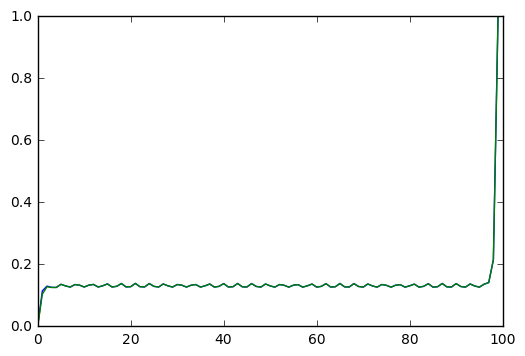

 				Norm


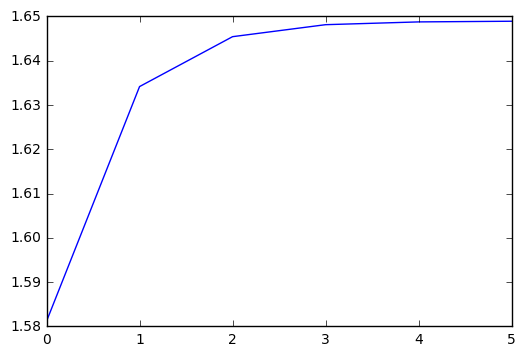

In [14]:

import matplotlib.pyplot as plt
e = 0.001 # precision
fb = np.zeros(n) #improved f
aa = np.zeros((n,n)) #improved a
norma = [] # norm x(i)
for p in range (0,n): # Lines loop
    for q in range (0,n): #colums loop
        aa[p][q] = -a[p][q] / a[p][p]
        fb[p] = f[p]/a[p][p]
    aa[p][p] += 1 # diagonal element must be equals 0

x = 0.1*np.ones(n) 
xr = np.zeros(n)
i = 0 

while 1>0: # solving
    i += 1
    xr = x
    x = np.dot(aa,x) + fb
    norma.append(la.norm(x))
    x[0] = 0.1
    xr[0] = 0.1
    if all(abs(x - xr) / x < e):
        x[0] = 0
        break
print(norma)



xx = np.linalg.solve(a , f)


pp = np.arange(0,i)
qq = np.arange(0,n)
print(' iterations  ', i)

print('\n  \t\t\t\tX(i)')
plt.plot(qq,x,c = 'b')
plt.plot(qq,xx,c = 'g')
plt.show()
print(' \t\t\t\tNorm')
plt.plot(pp,norma)
plt.show()

####   5. Вывод
* Значения интегралов, вычесленных с помощью встроенной функции и реккурентной формулы трапеций, совпадают с точностью до 3 знака после запятой(при большом номере итераций).
* Решение системы методом простой итерации совпадает с решением встроенной функцией c точностью до 4 знака после запятой.